<a href="https://colab.research.google.com/github/VanessaMovilla/hello-world/blob/master/Reto5_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1
## Vanessa Movilla 

In [0]:
from scipy.io import arff
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
#import warnings
#warnings.filterwarnings('ignore')

En primer lugar se importan los datos a utilizar y se separan por categoria. Esta separación se hace con el fin de mantener los datos balanceados al momento se dividir en entrenamiento, prueba y validación.

In [0]:
X=pd.read_csv('xtrain.txt',sep=' ',skipinitialspace=True,header=None)
Y=pd.read_csv('ytrain.txt',sep=' ',skipinitialspace=True,header=None)

X_0=np.array(X[Y[0]==0])
X_1=np.array(X[Y[0]==1])
Y_0=np.array(Y[Y[0]==0])
Y_1=np.array(Y[Y[0]==1])

Se separan los datos de entrenamiento, prueba y validación. Para esto se utiliza una proporción de 20/80 entre entrenamiento y prueba. Del 80% correspondiente a los datos de entrenamiento se toma un 15% para escoger el mejor modelo (validación).

In [0]:
ind_0= np.random.permutation(len(X_0))
ind_1= np.random.permutation(len(X_1))
n_0_train=int(np.ceil(len(X_0)*0.68))
n_1_train=int(np.ceil(len(X_1)*0.68))
n_0_test=int(np.ceil(len(X_0)*0.2))
n_1_test=int(np.ceil(len(X_1)*0.2))

X_train=np.concatenate((X_0[ind_0[:n_0_train]],X_1[ind_1[:n_1_train]]))
X_valid=np.concatenate((X_0[ind_0[n_0_train:-n_0_test]],X_1[ind_1[n_1_train:-n_1_test]]))
X_test=np.concatenate((Y_0[ind_0[-n_0_test:]],Y_1[ind_1[-n_1_test:]]))
Y_train=np.concatenate((Y_0[ind_0[:n_0_train]],Y_1[ind_1[:n_1_train]]))
Y_valid=np.concatenate((Y_0[ind_0[n_0_train:-n_0_test]],Y_1[ind_1[n_1_train:-n_1_test]]))
Y_test=np.concatenate((Y_0[ind_0[-n_0_test:]],Y_1[ind_1[-n_1_test:]])) 
Y_train=Y_train[:,0]
Y_test=Y_test[:,0]
Y_valid=Y_valid[:,0]

## Preprocesamiento de los datos. 
Antes de trabajar con los modelos es necesario estandarizar los datos de entrenamiento, para esto se realiza un preprocesamiento sencillo en el que se normalizan los datos al centrarlos en la media y dividirlos por la varianza. Por el momento se va a trabajar con los 30 descriptores presentados originalmente, sin embargo más adelante se realizaran pruebas con reducción de dimensionalidad. 

In [0]:
media=np.mean(X_train,0)
centr=X_train-media
var=np.var(centr,0)
X_train_norm=centr/var

Para evaluar los modelos se estandarizan los datos de validación utilizando la media y varianza calculados para los datos de entrenamiento.

In [0]:
centr_valid=X_valid-media
X_valid_norm=centr_valid/var

## Selección del modelo
En primer lugar se evalúa una red neuronal con una sola capa escondida. Con el fin de elegir el modelo adecuado se plantean modelos con las cuatro funciones de activación disponibles (relu, idenity, logistic, tanh). Para cada una de estas se tienen 25 modelos con diferentes números de neuronas que van desde 2 hasta 100. Para el caso de las funciones 'logistic'y 'tanh', fue necesario agregar el parámetro de regularización 'alpha' ya que cuando este tomaba un valor de 0 el algoritmo no llega a la convergencia en 500 iteraciones para una red con más de 20 neuronas. Este parámetro fue variado múltiples veces y los mejores resultado se obtuvieron con los valores que se muestran en el codigo. En el caso de 'relu' se agrega este mismo parametro de regularización ya que mejora el error en los datos de validación.   

In [0]:
classifiers_relu=[ MLPClassifier(hidden_layer_sizes=(i,),alpha=0.4,max_iter=500) for i in range(2,50,2)]
classifiers_identity=[ MLPClassifier(hidden_layer_sizes=(i,),activation='identity',alpha=0,max_iter=500) for i in range(2,100,5)]
classifiers_logistic=[ MLPClassifier(hidden_layer_sizes=(i,),activation='logistic',alpha=0.3,max_iter=800) for i in range(2,100,5)]
classifiers_tanh=[ MLPClassifier(hidden_layer_sizes=(i,),activation='tanh',alpha=0.3,max_iter=500) for i in range(2,100,5)]

Se entrenan los 100 modelos y se almacena el error de cada uno de ellos en los datos de validación. Como se puede observar en la gráfica correspondiente a la función de activación relu, el modelo está haciendo overfitting de los datos cuando el número de neuronas es muy alto.  




El menor error obtenido para esta función de activación es 0.283763277693475


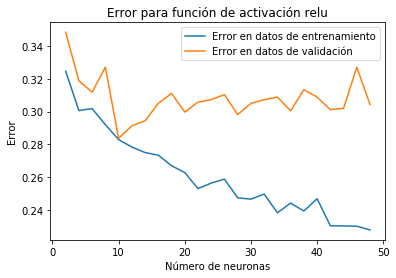

In [21]:
neuronas_relu=[i for i in range(2,50,2)]
score_relu_valid=np.zeros((len(classifiers_relu),))
score_relu_train=np.zeros((len(classifiers_relu),))
for i in range(len(classifiers_relu)):
    classifiers_relu[i].fit(X_train_norm, Y_train)  
    score_relu_valid[i]=classifiers_relu[i].score(X_valid_norm, Y_valid)
    score_relu_train[i]=classifiers_relu[i].score(X_train_norm, Y_train)
plt.plot(neuronas_relu,1-score_relu_train,label='Error en datos de entrenamiento')
plt.plot(neuronas_relu,1-score_relu_valid,label='Error en datos de validación')
plt.title('Error para función de activación relu')
plt.xlabel('Número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para esta función de activación es',np.min((1-score_relu_valid)))

El menor error obtenido para esta función de activación es 0.3482549317147192


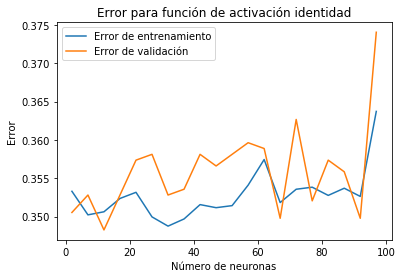

In [8]:
score_identity_valid=np.zeros((len(classifiers_identity),))
score_identity_train=np.zeros((len(classifiers_identity),))
neuronas_identity=[i for i in range(2,100,5)]
for i in range(len(classifiers_identity)):
    classifiers_identity[i].fit(X_train_norm, Y_train)
    score_identity_valid[i]=classifiers_identity[i].score(X_valid_norm, Y_valid)
    score_identity_train[i]=classifiers_identity[i].score(X_train_norm, Y_train)
plt.plot(neuronas_identity,1-score_identity_train,label='Error de entrenamiento')
plt.plot(neuronas_identity,1-score_identity_valid,label='Error de validación')
plt.title('Error para función de activación identidad')
plt.xlabel('Número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para esta función de activación es',np.min((1-score_identity_valid)))

El menor error obtenido para esta función de activación es 0.2936267071320182


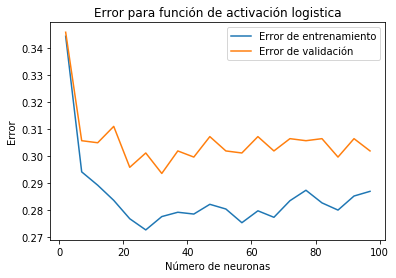

In [11]:
neuronas_logistic=[i for i in range(2,100,5)]
score_logistic_valid=np.zeros((len(classifiers_logistic),))
score_logistic_train=np.zeros((len(classifiers_logistic),))
for i in range(len(classifiers_logistic)):
    classifiers_logistic[i].fit(X_train_norm, Y_train)
    score_logistic_valid[i]=classifiers_logistic[i].score(X_valid_norm, Y_valid)
    score_logistic_train[i]=classifiers_logistic[i].score(X_train_norm, Y_train)    
plt.plot(neuronas_logistic,1-score_logistic_train,label='Error de entrenamiento')
plt.plot(neuronas_logistic,1-score_logistic_valid,label='Error de validación')
plt.title('Error para función de activación logistica')
plt.xlabel('Número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para esta función de activación es',np.min((1-score_logistic_valid)))

El menor error obtenido para esta función de activación es 0.3141122913505311


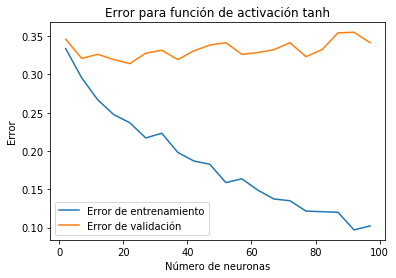

In [12]:
neuronas_tanh=[i for i in range(2,100,5)]
score_tanh_valid=np.zeros((len(classifiers_tanh),))
score_tanh_train=np.zeros((len(classifiers_tanh),))
for i in range(len(classifiers_tanh)):
    classifiers_tanh[i].fit(X_train_norm, Y_train)    
    score_tanh_valid[i]=classifiers_tanh[i].score(X_valid_norm, Y_valid)
    score_tanh_train[i]=classifiers_tanh[i].score(X_train_norm, Y_train)
plt.plot(neuronas_tanh,1-score_tanh_train,label='Error de entrenamiento')
plt.plot(neuronas_tanh,1-score_tanh_valid,label='Error de validación')
plt.title('Error para función de activación tanh')
plt.xlabel('Número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para esta función de activación es',np.min((1-score_tanh_valid)))

In [13]:
print('Para función de activación relu se tiene una precisión maxima de ',np.max(score_relu_valid),' para ',neuronas_relu[np.where(score_relu_valid==np.max(score_relu_valid))[0][0]],' neuronas')
print('Para función de activación logística se tiene una precisión maxima de ',np.max(score_logistic_valid),' para ',neuronas_logistic[np.where(score_logistic_valid==np.max(score_logistic_valid))[0][0]],' neuronas')
print('Para función de activación tanh se tiene una precisión maxima de ',np.max(score_tanh_valid),' para ',neuronas_tanh[np.where(score_tanh_valid==np.max(score_tanh_valid))[0][0]],' neuronas')
print('Para función de activación identidad se tiene una precisión maxima de ',np.max(score_identity_valid),' para ',neuronas_identity[np.where(score_identity_valid==np.max(score_identity_valid))[0][0]],' neuronas')

Para función de activación relu se tiene una precisión maxima de  0.7132018209408194  para  22  neuronas
Para función de activación logística se tiene una precisión maxima de  0.7063732928679818  para  32  neuronas
Para función de activación tanh se tiene una precisión maxima de  0.6858877086494689  para  22  neuronas
Para función de activación identidad se tiene una precisión maxima de  0.6517450682852808  para  12  neuronas


Continuando con la selección del modelo, se toman la función de activación (relu) y el número de neuronas (22) con menor error de clasificación en datos de validación . Se evalúan otros 300 modelos, 100 para cada algoritmo de entrenamiento disponible (adam,sgd,lgbs), cada uno de estos con una tasa de aprendizaje diferente que va desde 0.001 hasta 0.9.

In [0]:
learning_rates=np.arange(0.001,0.9,0.01)
classifiers_relu_adam=[ MLPClassifier(hidden_layer_sizes=(22,),alpha=0.4,learning_rate_init=learning_rates[i],max_iter=500) for i in range(len(learning_rates))]
classifiers_relu_sgd=[ MLPClassifier(hidden_layer_sizes=(22,),solver='sgd',alpha=0.4,learning_rate_init=learning_rates[i],max_iter=500) for i in range(len(learning_rates))]
classifiers_relu_lbfgs=[ MLPClassifier(hidden_layer_sizes=(22,),solver='lbfgs',alpha=0.4,learning_rate_init=learning_rates[i],max_iter=500) for i in range(len(learning_rates))]


El menor error obtenido para este algoritmo de entrenamiento es 0.30652503793626706


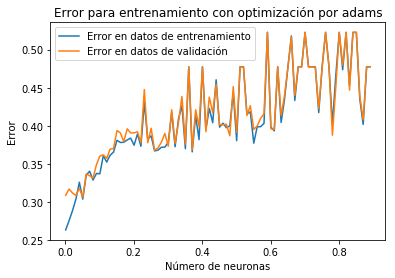

In [24]:
score_relu_adams_valid=np.zeros((len(classifiers_relu_adam),))
score_relu_adams_train=np.zeros((len(classifiers_relu_adam),))
for i in range(len(classifiers_relu_adam)):
    classifiers_relu_adam[i].fit(X_train_norm, Y_train)
    score_relu_adams_valid[i]=classifiers_relu_adam[i].score(X_valid_norm, Y_valid)
    score_relu_adams_train[i]=classifiers_relu_adam[i].score(X_train_norm, Y_train)
plt.plot(learning_rates,1-score_relu_adams_train,label='Error en datos de entrenamiento')
plt.plot(learning_rates,1-score_relu_adams_valid,label='Error en datos de validación')
plt.title('Error para entrenamiento con optimización por adams')
plt.xlabel('Número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para este algoritmo de entrenamiento es',np.min((1-score_relu_adams_valid)))
  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


El menor error obtenido para este algoritmo de entrenamiento es 0.291350531107739


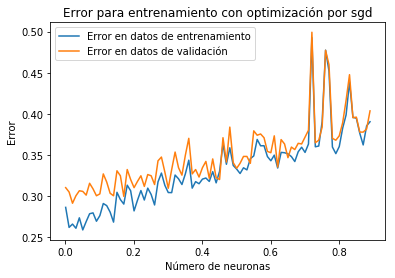

In [26]:
score_relu_sgd_valid=np.zeros((len(classifiers_relu_sgd),))
score_relu_sgd_train=np.zeros((len(classifiers_relu_sgd),))
for i in range(len(classifiers_relu_sgd)):
    classifiers_relu_sgd[i].fit(X_train_norm, Y_train)
    score_relu_sgd_valid[i]=classifiers_relu_sgd[i].score(X_valid_norm, Y_valid)  
    score_relu_sgd_train[i]=classifiers_relu_sgd[i].score(X_train_norm, Y_train)
plt.plot(learning_rates,1-score_relu_sgd_train,label='Error en datos de entrenamiento')
plt.plot(learning_rates,1-score_relu_sgd_valid,label='Error en datos de validación')
plt.title('Error para entrenamiento con optimización por sgd')
plt.xlabel('Número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para este algoritmo de entrenamiento es',np.min((1-score_relu_sgd_valid)))
  

El menor error obtenido para este algoritmo de entrenamiento es 0.29742033383915023


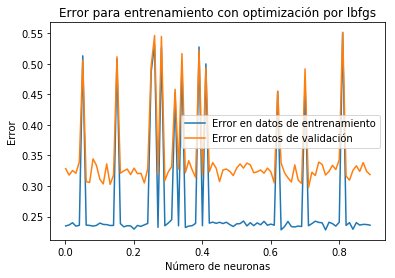

In [28]:
score_relu_lbfgs_valid=np.zeros((len(classifiers_relu_lbfgs),))
score_relu_lbfgs_train=np.zeros((len(classifiers_relu_lbfgs),))
for i in range(len(classifiers_relu_lbfgs)):
    classifiers_relu_lbfgs[i].fit(X_train_norm, Y_train)
    score_relu_lbfgs_valid[i]=classifiers_relu_lbfgs[i].score(X_valid_norm, Y_valid)
    score_relu_lbfgs_train[i]=classifiers_relu_lbfgs[i].score(X_train_norm, Y_train)
plt.plot(learning_rates,1-score_relu_lbfgs_train,label='Error en datos de entrenamiento')
plt.plot(learning_rates,1-score_relu_lbfgs_valid,label='Error en datos de validación')
plt.title('Error para entrenamiento con optimización por lbfgs')
plt.xlabel('Número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para este algoritmo de entrenamiento es',np.min((1-score_relu_lbfgs_valid)))

In [29]:
print('Para algoritmo de entrenamiento adam se tiene una precisión maxima de ',np.max(score_relu_adams_valid),' para una tasa de aprendizaje de ',learning_rates[np.where(score_relu_adams_valid==np.max(score_relu_adams_valid))[0][0]])
print('Para algoritmo de entrenamiento sgd se tiene una precisión maxima de ',np.max(score_relu_sgd_valid),' para una tasa de aprendizaje de ',np.round(learning_rates[np.where(score_relu_sgd_valid==np.max(score_relu_sgd_valid))[0][0]],3))
print('Para algoritmo de entrenamiento lbfgs se tiene una precisión maxima de ',np.max(score_relu_lbfgs_valid),' para una tasa de aprendizaje de ',np.round(learning_rates[np.where(score_relu_lbfgs_valid==np.max(score_relu_lbfgs_valid))[0][0]],3))


Para algoritmo de entrenamiento adam se tiene una precisión maxima de  0.6934749620637329  para una tasa de aprendizaje de  0.05099999999999999
Para algoritmo de entrenamiento sgd se tiene una precisión maxima de  0.708649468892261  para una tasa de aprendizaje de  0.021
Para algoritmo de entrenamiento lbfgs se tiene una precisión maxima de  0.7025796661608498  para una tasa de aprendizaje de  0.711


El mejor modelo hasta el momento tiene un error del 29.2% con una  función de activación relu, 22 neuronas, una tasa de aprendizaje de 0.021 y utiliza descenso de gradiente estocástico como algoritmo de entrenamiento. 

## Análisis de componentes principales
El error de validación del modelo escogido fue de 30% aproximadamente, por lo que se plantea la posibilidad de reducir la dimensión de los datos antes de entrenar el modelo. Para esto se utiliza en análisis de componentes principales visto en clase.


En primer lugar, se obtiene la matriz de covarianza de los datos de entrenamiento y se calculan los vectores propios de esta matriz. Esta matriz es ordenada de tal manera que la primera columna es el vector propio correspondiente al valor propio más grande y el ultimo al más pequeño. 

In [0]:
S=np.cov(X_train_norm.T);
D,V= np.linalg.eig(S);
ind=np.argsort(D);
ind=np.flip(ind);
u=V[:,ind];

Se realizan pruebas para el entramiento del modelo encontrado anteriormente con datos de dimensiones 2 a 28.  

El menor error obtenido para este algoritmo de entrenamiento es 0.35584218512898336


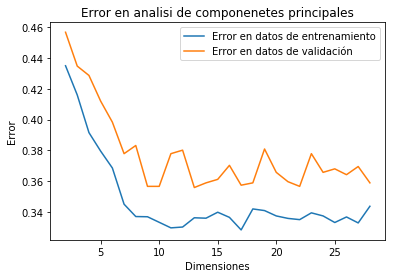

In [42]:
componentes=np.arange(2,29)
score_CP_valid=np.zeros((len(componentes),))
score_CP_train=np.zeros((len(componentes),))
for i in range(len(componentes)):  
  n=componentes[i]
  Ar=u[:,:n].T
  Z_train=np.matmul(Ar[:9,:],X_train_norm.T)
  Z_train=Z_train.T
  Z_valid=np.matmul(Ar[:9,:],X_valid_norm.T)
  Z_valid=Z_valid.T
  modelo_elegido.fit(Z_train, Y_train)
  score_CP_valid[i]=modelo_elegido.score(Z_valid, Y_valid)
  score_CP_train[i]=modelo_elegido.score(Z_train, Y_train)
plt.plot(componentes,1-score_CP_train,label='Error en datos de entrenamiento')
plt.plot(componentes,1-score_CP_valid,label='Error en datos de validación')
plt.title('Error en analisi de componenetes principales')
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para este algoritmo de entrenamiento es',np.min((1-score_CP_valid)))
  

Para estos el error aumento por lo que se realizan el mismo procedimiento con todas las funciones de activación probadas en la primero parte. 

In [0]:
classifier_relu=MLPClassifier(hidden_layer_sizes=(22,),alpha=0.4,max_iter=500)
classifier_identity=MLPClassifier(hidden_layer_sizes=(32,),activation='identity',alpha=0,max_iter=500) 
classifier_logistic= MLPClassifier(hidden_layer_sizes=(22,),activation='logistic',alpha=0.3,max_iter=800)
classifier_tanh= MLPClassifier(hidden_layer_sizes=(12,),activation='tanh',alpha=0.3,max_iter=500) 

In [0]:
componentes=np.arange(2,29)
score_CP_valid_relu=np.zeros((len(componentes),))
score_CP_train_relu=np.zeros((len(componentes),))
score_CP_valid_identity=np.zeros((len(componentes),))
score_CP_train_identity=np.zeros((len(componentes),))
score_CP_valid_logistic=np.zeros((len(componentes),))
score_CP_train_logistic=np.zeros((len(componentes),))
score_CP_valid_tanh=np.zeros((len(componentes),))
score_CP_train_tanh=np.zeros((len(componentes),))
for i in range(len(componentes)):  
  n=componentes[i]
  Ar=u[:,:n].T
  Z_train=np.matmul(Ar[:9,:],X_train_norm.T)
  Z_train=Z_train.T
  Z_valid=np.matmul(Ar[:9,:],X_valid_norm.T)
  Z_valid=Z_valid.T
  
  classifier_relu.fit(Z_train, Y_train)
  classifier_identity.fit(Z_train, Y_train)
  classifier_logistic.fit(Z_train, Y_train)
  classifier_tanh.fit(Z_train, Y_train)
  
  score_CP_valid_relu[i]=classifier_relu.score(Z_valid, Y_valid)
  score_CP_train_relu[i]=classifier_relu.score(Z_train, Y_train)
    
  score_CP_valid_identity[i]=classifier_identity.score(Z_valid, Y_valid)
  score_CP_train_identity[i]=classifier_identity.score(Z_train, Y_train)
    
  score_CP_valid_logistic[i]=classifier_logistic.score(Z_valid, Y_valid)
  score_CP_train_logistic[i]=classifier_logistic.score(Z_train, Y_train)
    
  score_CP_valid_tanh[i]=classifier_tanh.score(Z_valid, Y_valid)
  score_CP_train_tanh[i]=classifier_tanh.score(Z_train, Y_train)

Como se puede ver en las gráficas de error para cada función, este no mejoró en ningún caso por lo que se conservan las 30 características de los datos originales para el entrenamiento. 

El menor error obtenido para esta prueba fue de 0.3391502276176024


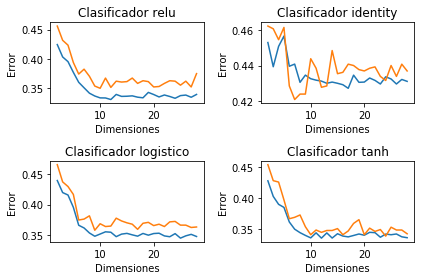

In [51]:
plt.subplot(2,2,1).set_title('Clasificador relu')
plt.plot(componentes,1-score_CP_train_relu,label='Error en datos de entrenamiento')
plt.plot(componentes,1-score_CP_valid_relu,label='Error en datos de validación')
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.subplot(2,2,2).set_title('Clasificador identity')
plt.plot(componentes,1-score_CP_train_identity,label='Error en datos de entrenamiento')
plt.plot(componentes,1-score_CP_valid_identity,label='Error en datos de validación')
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.subplot(2,2,3).set_title('Clasificador logistico')
plt.plot(componentes,1-score_CP_train_logistic,label='Error en datos de entrenamiento')
plt.plot(componentes,1-score_CP_valid_logistic,label='Error en datos de validación')
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.subplot(2,2,4).set_title('Clasificador tanh')
plt.plot(componentes,1-score_CP_train_tanh,label='Error en datos de entrenamiento')
plt.plot(componentes,1-score_CP_valid_tanh,label='Error en datos de validación')
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.tight_layout()
print('El menor error obtenido para esta prueba fue de',min(np.min((1-score_CP_valid_relu)),np.min((1-score_CP_valid_identity)),np.min((1-score_CP_valid_logistic)),np.min((1-score_CP_valid_tanh))))

## Pruebas con modelo multicapa


Como punto de partida, se evalúa el mejor modelo encontrado en la primera parte y se mide el error para variaciones en el  número de neuronas, este procedimiento se repite para 50 modelos con neuronas que van desde 2 hasta 500. 

In [0]:
ind_neuronas=np.arange(2,300,10)
neuronas_capa1= ind_neuronas[np.where(score_capa1_valid==np.max(score_capa1_valid))[0][0]]
classifiers_capa2=[ MLPClassifier(hidden_layer_sizes=(22,i,),solver='sgd',alpha=0.4,learning_rate_init=0.021,max_iter=500) for i in range(2,300,10)]
score_capa2_train= np.zeros(len(classifiers_capa2,))
score_capa2_valid= np.zeros(len(classifiers_capa2,))
for i in range(len(classifiers_capa2)):
    classifiers_capa2[i].fit(X_train_norm, Y_train)
    score_capa2_valid[i]=classifiers_capa2[i].score(X_valid_norm, Y_valid)
    score_capa2_train[i]=classifiers_capa2[i].score(X_train_norm, Y_train)
    print(i)

El menor error obtenido para este algoritmo es  0.30197268588770865


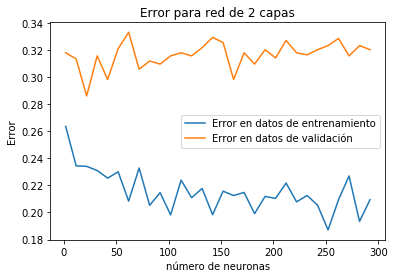

In [80]:
plt.plot(np.arange(2,300,10),1-score_capa2_train,label='Error en datos de entrenamiento')
plt.plot(np.arange(2,300,10),1-score_capa2_valid,label='Error en datos de validación')
plt.title('Error para red de 2 capas')
plt.xlabel('número de neuronas')
plt.ylabel('Error')
plt.legend();
print('El menor error obtenido para este algoritmo es ',np.min((1-score_multi_valid)))

De estos 50 modelos se selecciona aquel con la mayor precisión. A este se le agrega una nueva capa dejando constantes el número de neuronas de la primera y segunda capa. 

In [0]:
neuronas_capa2= ind_neuronas[np.where(score_capa2_valid==np.max(score_capa1_valid))[0][0]]
classifiers_capa3=[ MLPClassifier(hidden_layer_sizes=(22,neuronas_capa2,i,),solver='sgd',alpha=0.4,learning_rate_init=0.021,max_iter=500) for i in range(2,300,10)]
score_capa3_valid= np.zeros(len(classifiers_capa3,))
score_capa3_train= np.zeros(len(classifiers_capa3,))                                                                
for i in range(len(classifiers_capa3)):
    classifiers_capa3[i].fit(X_train_norm, Y_train)                                                          
    score_capa3_valid[i]=classifiers_capa3[i].score(X_valid_norm, Y_valid)
    score_capa3_train[i]=classifiers_capa3[i].score(X_train_norm, Y_train)
    print (i)

Al comparar el desempeño de los modelos con los datos de validación, se puede observar que no hay un cambio significativo en la precisión de este y del encontrado para una sola capa. 


El mejor resutlado titene un error de 0.2860394537177542


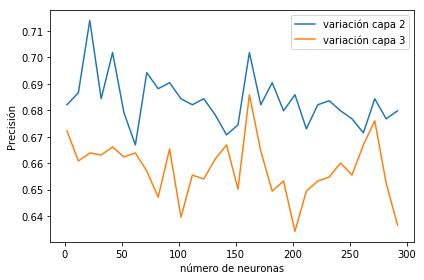

In [87]:
ind_neuronas=np.arange(2,300,10)
neuronas_capa3= ind_neuronas[np.where(score_capa3_valid==np.max(score_capa3_valid))[0][0]]
plt.plot(ind_neuronas,score_capa2_valid,label='variación capa 2')
plt.plot(ind_neuronas,score_capa3_valid,label='variación capa 3')
plt.xlabel('número de neuronas')
plt.ylabel('Precisión')
plt.legend();
plt.tight_layout()
print('El mejor resutlado titene un error de',min(np.min(1-score_capa2_valid),np.min(1-score_capa3_valid)))

El modelo seleccionado presentó un error del 28.6%, lo cual no implica una mejora considerable al ser comparado con el modelo encontrado en la primera parte. El primer modelo podria llegar a ser una mejor opción debido a que es más sencillo.  

## Evaluación del modelo 

Para finalizar se selecciona el modelo con  mejor precisión y se evalua con los datos de prueba. El modelo elegido tiene una capa, 22 neuronas, una  función de activación relu, tasa de aprendizaje de 0.021 y utiliza descenso de gradiente estocástico como algoritmo de entrenamiento.   

In [88]:
modelo_elegido= MLPClassifier(hidden_layer_sizes=(22,),solver='sgd',learning_rate_init=0.021,max_iter=1000)
modelo_elegido.fit(X_train_norm, Y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(22,), learning_rate='constant',
              learning_rate_init=0.021, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Se entrena nuevamente el modelo seleccionado y se evalúa su desempeño con los datos de prueba estandarizados con el fin de encontrar un estimativo de la probabilidad de error. 

In [89]:
centr_test=X_test-media
X_test_norm=centr_test/var
modelo_elegido.score(X_test_norm,Y_test)

0.880363739698778

El estimativo de la probabilidad de error del modelo seleccionado es del 12% aproximadamente.

## Calculo de etiquetas de prueba

In [0]:
X_test=pd.read_csv('xtest.txt',sep=' ',skipinitialspace=True,header=None)
X_test=np.array(X_test)
Y_test=modelo_elegido.predict(X_test)
np.savetxt('ytest.txt',Y_test)